In [1]:
import os   # for traversing the files in directory
import numpy as np
import time
from collections import Counter

In [2]:
import re     # regular expressions for splitting the data into seperate strings
import matplotlib.pyplot as plt

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , confusion_matrix

In [4]:
# this function generates the vocabulary by reaDING THE STRINGS IN ALL 16000 files and comparing them with 
                        #the list of stopwords, rest 4000 files are for testing and they are not used in building vocab
def build_vocabulary(rootdir,stopwords):      
    vocab={}
    for dirname,subdir,filename in os.walk(rootdir):
        cnt=0
        for file in filename:
            if cnt>=800:      # for each class we are taking 800 files for training
                continue
            filepath= os.path.join(dirname,file)
            with open(filepath,'r') as f:
                #for j in range(12):     # skipping the first 12 lines of each file as it contains useless info.
                 #   f.readline() 
                filedata = f.read()
                filedata = filedata.lower()
                wordlist = re.split(r"\W|\d",filedata)   # splitting the data into seperate strings
                counter=Counter(wordlist)
                common_words=list(set(wordlist)-set(stopwords))
                for word in common_words:
                    freq=counter[word]          # adding word in vocab if it's not in stopwords
                    if word in vocab:
                        vocab[word]+=freq
                    else:
                        vocab[word]=freq
            cnt+=1
    return vocab


In [5]:
# rootdir is the path where the files are in my pc  
rootdir='E:/machine_learning/attachments/csv/text_classification_data/20_newsgroups/20_newsgroups'
stopwords = list([""," ","a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"])
#print(stopwords)
start=time.time()
vocabulary= build_vocabulary(rootdir,stopwords)  # generate the vocabulary
end=time.time()
print(end-start)
#vocabulary

108.4022650718689


In [6]:
# sorting the vocabulary on the basis of frequency of words
vocab={}
def cmp(t):
    return t[1]
start=time.time()
for k,v in sorted(vocabulary.items(),key = cmp,reverse = True):
    vocab[k]= v
end=time.time()
print(end-start)
print(vocab==vocabulary)
#print(vocab)
len(vocab)

0.16411733627319336
True


109221

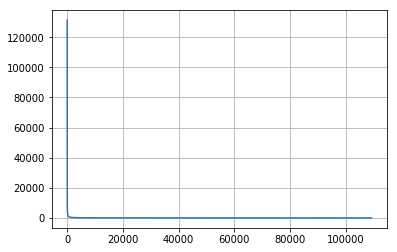

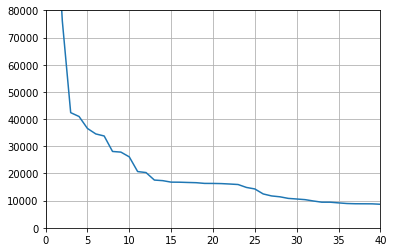

In [7]:
# plotting freq vs number of words with freq greater than or equal to that freq
y_axis=vocab.values()
x_axis=[]
cnt=1
for freq in y_axis:
    x_axis.append(cnt)
    cnt+=1
plt.plot(x_axis,y_axis)
plt.grid()
#plt.axis([8000,100000,0,50])
plt.show()
plt.plot(x_axis,y_axis)
plt.grid()
plt.axis([0,40,0,80000])
plt.show()

In [8]:
# taking only the top 10000 words from the vocabulary
cnt=0
vocabulary={}
for k,v in vocab.items():
    if cnt<=10:
        cnt+=1
        continue
    if cnt>=10000:
        break
    vocabulary[k]= v
    cnt+=1
len(vocabulary)

9989

In [9]:
# generates the training and testing data in form of arrays
def gen_train_test(rootdir,vocabulary,class_list):
    x_train , x_test , y_train , y_test = [],[],[],[]
    vocab_idx_dict={}
    i=0
    for key in vocabulary.keys():
        vocab_idx_dict[key]=i
        i+=1
    for dirname,subdir,filename in os.walk(rootdir):
        cnt=0
        class_name=''
        for c_name in class_list:
            if c_name in dirname:
                class_name=c_name
        for file in filename:
            filepath=os.path.join(dirname,file)
            x=np.zeros(len(vocabulary))
            with open(filepath,'r') as f:
                #for j in range(12):
                 #   f.readline()
                filedata=f.read()
                filedata=filedata.lower()
                wordlist = re.split(r"\W|\d",filedata)
                counter=Counter(wordlist)
                common_words=list(set(vocabulary)&set(wordlist))
                for word in common_words:   # for each file we are adding a row with the freq of each word in vocabulary
                    freq=counter[word]           # in that particular file
                    idx=vocab_idx_dict[word]
                    x[idx]=freq
            if cnt<800:                    # 800 files of each class are added in the training data, rest 200 in testing
                x_train.append(x)
                y_train.append(class_name)
            else:
                x_test.append(x)
                y_test.append(class_name)
            cnt+=1
    return x_train,x_test,y_train,y_test


In [10]:
# class_list contains the name of all 20 classes
class_list=os.listdir(rootdir)
start=time.time()
x_train,x_test,y_train,y_test=gen_train_test(rootdir,vocabulary,class_list) # generates the training and testing data
end=time.time()                                                                               
print(end-start)

56.50481295585632


In [11]:
print(len(x_train),len(y_train),len(x_test),len(y_test))

16000 16000 3997 3997


In [12]:
# creating numpy arrays of training and testing data as numpy arrays are faster
x_train=np.array(x_train)
x_test=np.array(x_test)
keys=set(y_train)
class_dict={}
i=0
for k in keys:
    class_dict[k]=i       # replacing each class with a unique number as numpy arrays only contain numbers
    i+=1
l=[]
start=time.time()
for y in y_train:
    l.append(class_dict[y])
y_train=np.array(l)
l=[]
for y in y_test:
    l.append(class_dict[y])
y_test=np.array(l)
end=time.time()
print(end-start)

0.005018711090087891


In [13]:
print(len(x_train),len(y_train),len(x_test),len(y_test))

16000 16000 3997 3997


In [14]:
# this function generates the dictonary which will be used in the predict function
def fit(x_train,y_train,vocabulary):
    dict={}
    dict["total_data"]=len(y_train) # total_data is the nummber of training data points
    class_set=set(y_train)
    for current_class in class_set:
        dict[current_class]={}
        current_class_data= (y_train==current_class)
        current_class_data= x_train[current_class_data]    #total_count for each class is the number of training data 
        dict[current_class]['total_count']=len(current_class_data)       # points belonging to that class
        idx=0
        sum=0
        for feature in vocabulary:
            dict[current_class][feature]=current_class_data[:,idx].sum()
            sum+=dict[current_class][feature]
            idx+=1
        dict[current_class]['total_words']=sum      # total_words for each class is the total number of words in        
    return dict                                  # the training data for that class


In [15]:
# it calculates the feature probability for one class
def probability(dict,x):
    ret_val=0
    t=0
    num_features=len(dict.keys())-2
    den=dict['total_words']+ num_features   # num_features is laplace correction
    idx1=list(dict.keys()).index('total_words')
    idx2=list(dict.keys()).index('total_count')
    num_array=list(dict.values()) 
    if idx1>idx2:
        del num_array[idx1]
        del num_array[idx2]
    else:
        del num_array[idx2]
        del num_array[idx1]
    start=time.time()
    
    num_array=np.array(num_array)
    num_array=num_array+1   # 1 is laplace correction
    num_array=num_array/den
    array=np.log(num_array)
    array=array*x    # multiplying the probability of each word with its frequency of occurence in that testing data pt
    ret_val=array.sum()
    end=time.time()
    t+=end-start
    return ret_val,t

In [16]:
# it predicts the class for one testing data point
def predict_single_point(dict,x):
    classes=dict.keys()
    t=0
    ret_val=-10
    class_name=-100
    check_first=True
    log_total_data= np.log(dict['total_data'])
    for curr_class in classes:    # calculate probability for all classes and select the class with max. probability 
        if curr_class=='total_data':
            continue
        prob_class= np.log(dict[curr_class]['total_count'])- log_total_data  # prior probability or class probability
        prob_feature,temp=probability(dict[curr_class],x)    # feature probability
        t+=temp
        prob=prob_class+prob_feature
        if check_first :
            ret_val=prob
            class_name=curr_class
            check_first=False
        if ret_val<prob:
            ret_val=prob
            class_name=curr_class
    return class_name,t


In [17]:
# it predicts the class for all 4000 testing data points
def predict(dict,x_test):
    y_pred=[]
    t=0
    for i in range(x_test.shape[0]):
        y,temp=predict_single_point(dict,x_test[i,:])
        y_pred.append(y)
        t+=temp
    print(t)
    return y_pred


In [18]:
start=time.time()
dictionary= fit(x_train,y_train,vocabulary)
end=time.time()
print(end-start)
y_pred=predict(dictionary,x_test)
end1=time.time()
print(end1-end)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

2.0304512977600098
67.78162145614624
108.31429195404053
             precision    recall  f1-score   support

          0       0.83      0.66      0.74       200
          1       0.75      0.93      0.83       200
          2       0.81      0.81      0.81       200
          3       0.89      0.95      0.92       200
          4       0.96      0.86      0.91       200
          5       0.90      0.55      0.68       200
          6       0.64      0.81      0.71       200
          7       0.70      0.69      0.70       200
          8       0.87      0.70      0.78       200
          9       0.97      0.96      0.96       200
         10       0.81      0.92      0.86       200
         11       0.95      0.91      0.93       200
         12       0.63      0.66      0.64       200
         13       0.89      0.93      0.90       200
         14       0.76      0.90      0.82       200
         15       0.94      0.91      0.92       200
         16       0.92      0.93      0.92

In [19]:
# using the inbuilt multinomial naive bayes for text classification
clf=MultinomialNB()
start=time.time()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
end=time.time()
print(end-start)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(clf.score(x_test,y_test))
y_pred=clf.predict(x_train)
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print(clf.score(x_train,y_train))

1.1343269348144531
             precision    recall  f1-score   support

          0       0.83      0.66      0.74       200
          1       0.75      0.93      0.83       200
          2       0.81      0.81      0.81       200
          3       0.89      0.95      0.92       200
          4       0.96      0.86      0.91       200
          5       0.90      0.55      0.68       200
          6       0.64      0.81      0.71       200
          7       0.70      0.69      0.70       200
          8       0.87      0.70      0.78       200
          9       0.97      0.96      0.96       200
         10       0.81      0.92      0.86       200
         11       0.95      0.91      0.93       200
         12       0.63      0.66      0.64       200
         13       0.89      0.93      0.90       200
         14       0.76      0.90      0.82       200
         15       0.94      0.91      0.92       200
         16       0.92      0.93      0.92       200
         17       0.96    

In [ ]:
################# testing cell ################

def cmp(t):
    return t[1]

d={'e':1,'a':4,'r':0,'b':10}
type(d.items())
sorted(d.items(),key = cmp)

d=((1,'e'),(4,'a'),(0,'r'),(10,'b'))
sorted(d,reverse=True)

d=[(1,'abc'),(4,'azxc'),(0,'rwef'),(10,'bdc')]
sorted(d,reverse=True)

for k in range(10):
    if k>5:
        break
    print(k)
    
#"abcde"-"abc"
os.listdir('E:/machine_learning/attachments/csv/text_classification_data/20_newsgroups/20_newsgroups')[0]
'sh' in 'yash'
type(os.listdir(rootdir))
a=np.array([[1,2],[2,3],[3,4]])
a[1,:].shape

d={'e':1,'a':4,'r':0,'b':10}
list(d.keys()).index('a')
len(d)

l=[]
l1=np.array([1,2,3])
l.append(l1)
l
from sklearn.decomposition import PCA
pca=PCA()
x_train_trans=pca.fit_transform(x_train)
x_test_trans=pca.transform(x_test)
pca.explained_variance_
curr_var=0
k=0
total=pca.explained_variance_.sum()
while curr_var/total < 0.99:
    curr_var+=pca.explained_variance_[k]
    k+=1
k=k-1
k
pca=PCA(n_components=k)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
x_train=x_train_pca
x_test=x_test_pca



a=[1,1,1,0,1,0,0,2,2,1,2]
Counter(a)
Counter(a)[1]

a=[1,2,1,3,4,5]
b=[1,2,3,4,6,7]
set(a)-set(b)

a=[1,10,20,20,1,30]
np.log(a)

a=np.array([])
#a.append(1)
a

a=np.array([2,4,6,8,10])
b=np.array([2,4,6,8,5])
a/b

d={'e':1,'a':4,'r':0,'b':10}
len(d.keys())

a=[1,2,3,4]

def check(d):
    print(d)
    del d['a']
    print(d)
    return

d={1:{'a':1,'b':2},2:{'a':4,'b':8}}
d1={}
for k,v in d.items():
    d1[k]=v

print(d)
print(d1)
check(d1[1])
print(d)
print(d1)

a=[1,2,3,4,5]
del a[1,2]